<h1 style="text-align:center">Optymalizacja zmiany biegów samochodu</h1>

## Wstęp

Skrzynia zmiany biegów jest mechanizmem, który przekłada obroty silnika na koła pojazdu, umożliwiając ruszanie, przyspieszanie oraz jazdę z różnymi prędkościami. Poprzez dobór odpowiednich przełożeń pozwala ona utrzymać silnik w korzystnym zakresie obrotów. Niższe biegi zapewniają większą siłę napędową przy niskich prędkościach, natomiast wyższe biegi umożliwiają ekonomiczną jazdę ze stałą prędkością.

## Cel projektu

Celem projektu jest opracowanie strategii optymalnej zmiany biegów, która zmniejszy zużycie paliwa oraz emisję tlenków azotu. Odpowiedni dobór momentu zmiany biegu pozwala utrzymać silnik w obszarze najwyższej sprawności, co przekłada się na bardziej ekonomiczną i ekologiczną eksploatację pojazdu.

## Opis modelu

### Ruch samochodu
Zakładamy że samochód porusza się ruchem prostoliniowym, na twardej nawierzchni, układ napędowy jak i silnik nie tracą na sprawnosci. Wtedy ruch samochodu można opisać wzorem z II zasady dynamiki Newtona
$$\sum F = ma$$
Które można przekształcić na<sup><a href=#zrodlo1>1</a></sup>
$$\frac{dv}{dt} = \frac{1}{m}(F_{x}-F_{D}-F_{R}-F_{G})$$

gdzie   
$F_{x}$ - siła pociągowa   
$F_{D}$ - opór areodynamiczny   
$F_{R}$ - opór toczenia  
$F_{G}$ - opór nachylenia terenu  

#### Postacie poszczególnych sił

##### Siła pociągowa<sup><a href=#zrodlo1>1</a></sup>
Siła generowana przez układ napędowy, przenoszona na podłoże, która umożliwia ruch obiektu wynosi. Wpływ bezwładności elementów wirujących pominięto, zakładając że ich wkład do dynamiki ruchu pojazdu jest niewielki w porównaniu z masą pojazdu.

$$F_{x} = \frac{T_{Eng}R_{n}\eta}{r}$$
gdzie  
$T_{Eng}$ - moment obrotowy silnika  
$R_{n}$ - stosunek przełożenia n  
$\eta$ - sprawność układu napędowego  
$r$ - promień opony

##### Opór areodynamiczny<sup><a href=#zrodlo1>1</a></sup>
Opór areodynamiczny działający na rzut powierzchni przodu pojazdu $A_{f}$ przy prędkości $v$ opisuje wzór

$$F_{D} = \frac{1}{2}\rho c_{W}Sv^2$$
gdzie  
$\rho$ - gęstość powietrza  
$c_{W}$ - współczynnik oporu pojazdu  
$S$ - powierzchnia czołowa pojazdu

##### Opór toczenia<sup><a href=#zrodlo1>1</a></sup>
Opór toczenia wyraża wzór

$$F_{R} = \mu mg\cos(\theta)$$

gdzie  
$\mu$ - współczynnik tarcia toczenia  
$\theta$ - kąt nachylenia terenu
##### Opór nachylenia terenu(Siła gradientu)<sup><a href=#zrodlo1>1</a></sup>

$$F_{G} = mg\sin(\theta)$$

#### Równanie ruchu

Zgodnie z wyprowadzeniem wszystkich sił działających na pojazd i podstaweniu ich do równania otrzymujemy
$$\frac{dv}{dt} = \frac{1}{m}(\frac{T_{Eng}R_{n}\eta}{r}-\frac{1}{2}\rho c_{W}Sv^2-\mu mg\cos(\theta)-mg\sin(\theta))$$

---

## Wyznaczenie punktu pracy silnika

Prędkość obrotowa wału korbowego silnika wynosi:

$$
N_{eng} = \frac{v \cdot i_g \cdot i_0}{2\pi \cdot r_{wheel}} \cdot 60
$$

Moment obrotowy generowany przez silnik, wynikający z równowagi sił oporów ruchu, można wyrazić jako:

$$
T_{eng} = \frac{R_{total} \cdot r_{wheel}}{i_g \cdot i_0 \cdot \eta_{trans}}
$$

gdzie:

- $i_g$ — przełożenie wybranego biegu  
- $i_0$ — przełożenie główne  
- $R_{total}$ — całkowita siła oporów ruchu  
- $\eta_{trans}$ — sprawność układu przeniesienia napędu  

---

## Model zużycia paliwa oparty na BSFC

Zamiast stałej sprawności $\eta$, stosuje się jednostkowe zużycie paliwa **BSFC**, które zależy od aktualnego punktu pracy silnika $(N_{eng}, T_{eng})$.

$$
\dot{m}_f(t) = \frac{BSFC(N_{eng}, T_{eng}) \cdot P_e(t)}{3.6 \times 10^6}
$$

gdzie:

- $BSFC(N, T)$ — jednostkowe zużycie paliwa [$\mathrm{g/kWh}$]  
- $P_e(t)$ — moc mechaniczna silnika [$\mathrm{W}$], obliczana jako  
$$
P_e = F_{\text{opory}} \cdot v
$$
- $3.6 \times 10^6$ — współczynnik konwersji z $\mathrm{kWh}$ na $\mathrm{Ws}$ (J)

---

## Model emisji NOx

Jednostkowa emisja tlenków azotu zależy od aktualnego punktu pracy silnika $(N_{eng}, T_{eng})$:

$$
\dot{m}_{NO_x}(t) = \frac{e_{NO_x}(N_{eng}, T_{eng}) \cdot P_e(t)}{3.6 \times 10^6}
$$

gdzie:

- $e_{NO_x}(N, T)$ — jednostkowa emisja NOx [$\mathrm{g/kWh}$]  
- $P_e(t)$ — moc mechaniczna silnika [$\mathrm{W}$]

---

## Funkcja celu optymalizacji

Celem algorytmu sterującego zmianą biegów jest wybór takiej sekwencji przełożeń $i_g(t)$, która minimalizuje koszt przejazdu:

$$
J = \int_0^{T} \left[ W \cdot \dot{m}_f(t) + (1 - W) \cdot \dot{m}_{NO_x}(t) \right] \, dt
$$

gdzie:

- $W \in [0,1]$ — współczynnik wagowy określający kompromis pomiędzy oszczędnością paliwa a redukcją emisji NOx
### Emisja gazów


Optymalne parametry: [15.6]
Minimalne zużycie paliwa [kg]: 36.88255554030134


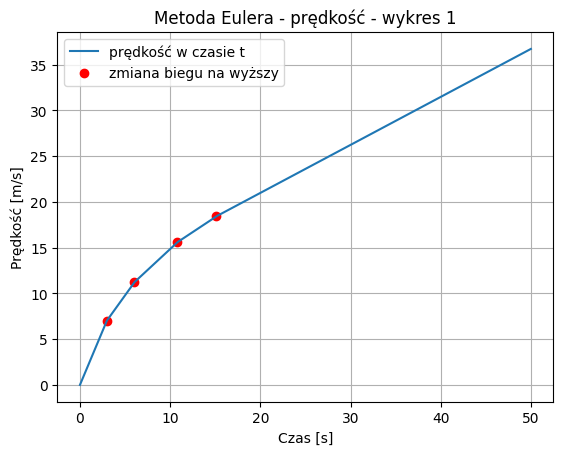

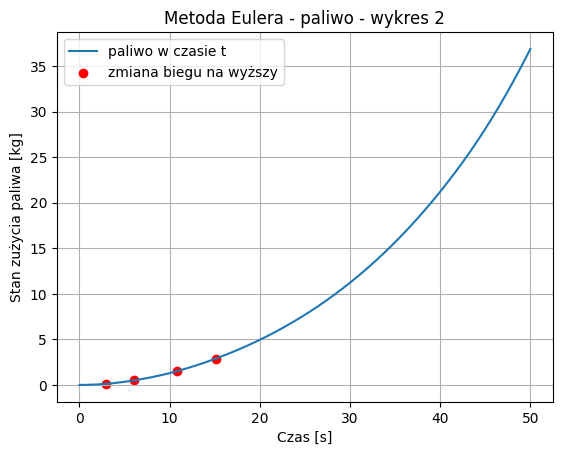

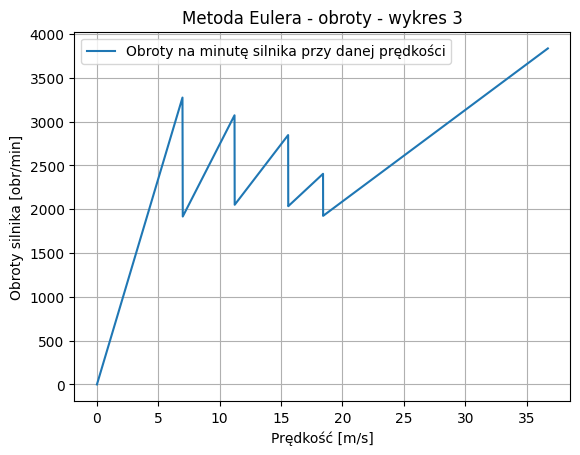

In [51]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from scipy.optimize import minimize

# --- Parametry ---
m = 1500.0          # masa [kg]
      
i_g = 4.1           # przełożenie główne
i_0 = [3.6, 2.1, 1.4, 1.0, 0.8] # przełożenie wybranego biegu
R=[]
for j in i_0:
    R.append(i_g*j)           
eta = 0.9           # sprawność [-]
r = 0.3             # promień koła [m]

rho = 1.225         # gęstość powietrza [kg/m^3]
c_W = 0.32          # współczynnik oporu
S = 2.2             # powierzchnia czołowa [m^2]

mu = 0.01          # współczynnik oporu toczenia
g = 9.81            # przyspieszenie ziemskie [m/s^2]
theta = 0.0         # kąt nachylenia drogi [rad]

                    #mapa bsfc
rpm = np.array([500, 1000, 1500, 2000, 2500, 3000,
                3500, 4000, 4500, 5000, 5500, 6000])

torque = np.array([15.6, 31.2, 46.8, 62.4, 78,
                   93.6, 109.2, 124.8, 140.4, 156, 171.6])

bsfc = np.array([
    [612.2, 442.7, 370.8, 331.2, 306.0, 313.2, 302.4, 324.0, 288.0, 288.0, 288.0],
    [612.0, 403.2, 336.6, 307.8, 284.4, 286.2, 282.6, 284.4, 288.0, 288.0, 288.0],
    [612.0, 406.8, 345.6, 306.0, 280.8, 262.8, 254.5, 246.6, 252.0, 288.0, 288.0],
    [594.0, 396.0, 334.8, 300.6, 275.4, 259.2, 244.8, 244.8, 248.4, 262.8, 288.0],
    [558.0, 381.6, 320.4, 284.4, 266.4, 246.6, 244.8, 244.8, 244.8, 255.6, 288.0],
    [522.0, 365.4, 311.4, 279.0, 262.8, 255.6, 248.4, 244.8, 244.8, 259.2, 288.0],
    [468.0, 340.2, 288.0, 280.8, 277.2, 267.5, 259.2, 248.4, 244.8, 262.8, 288.0],
    [522.0, 356.4, 317.5, 304.2, 282.6, 275.4, 262.8, 253.8, 262.8, 266.4, 288.0],
    [540.0, 392.4, 351.4, 316.8, 293.4, 279.0, 271.8, 270.0, 272.9, 275.4, 288.0],
    [684.0, 460.8, 378.0, 333.0, 306.0, 284.4, 283.3, 279.0, 283.0, 284.4, 288.0],
    [756.0, 511.2, 421.2, 365.4, 327.6, 295.2, 298.8, 295.2, 291.6, 289.8, 288.0],
    [756.0, 529.2, 432.0, 374.4, 334.8, 313.2, 298.8, 295.2, 291.6, 288.0, 288.0]
])


# --- Parametry symulacji ---
dt = 0.01           # krok czasowy [s]
t_max = 50.0        # czas symulacji [s]

# --- Warunki początkowe ---
v0 = 0.0            # prędkość początkowa [m/s]

# --- Wektory czasu i prędkości ---
t = np.arange(0, t_max, dt)

H_u= 43*10**6
eta1 = 0.3
N_eng_max = 6500
N_eng_opt = 3000 

list_v = []
list_t = []
list_f = []


bsfc_interp = RegularGridInterpolator(
    (rpm, torque),
    bsfc,
    bounds_error=False,
    fill_value=None
)

def T_max(N):
    if N < 1000:
        return 120
    elif N < 3000:
        return 120 + (N-1000)*(80/2000) 
    elif N < 4500:
        return 200 - (N-3000)*(40/1500)  
    else:
        return 100
    
def bsfc_map(N_eng, T_eng):
    N_eng = np.clip(N_eng, rpm.min(), rpm.max())
    T_eng = np.clip(T_eng, torque.min(), torque.max())
    return float(bsfc_interp((N_eng, T_eng)))
def fuel_opt(params):
    list_v = []
    list_t = []
    list_f = []
    T_eng_min = params
    v = np.zeros(len(t))
    v[0] = v0
    fuel = np.zeros(len(t))
    fuel[0] = 0
    n = 0
    N_list = np.zeros(len(t)) 

    for i in range(len(t) - 1):

        N_eng = v[i]/(2*math.pi*r)*R[n]*60
        if N_eng > N_eng_max and n<len(R) - 1:
            n+=1
            N_eng = v[i]/(2*math.pi*r)*R[n]*60

        F_d = 0.5 * rho * c_W * S * v[i]**2
        F_r = mu * m * g * np.cos(theta)
        F_g = m * g * np.sin(theta)
        R_total = F_d + F_r + F_g

        T_req = (R_total*r)/(R[n]*eta)
        T_eng = min(T_max(N_eng), T_req + 80)
        T_eng = max(T_eng, T_eng_min)

        N_list[i] = N_eng

        dvdt = (1/m) * ((T_eng * R[n] * eta) / r - F_d - F_r - F_g)
        v[i+1] = v[i] + dvdt * dt
        dmdt = (bsfc_map(N_eng, T_eng)*R_total*v[i])/(3.6*10**6)
        if n<len(R) - 1:
            N_eng_next = v[i]/(2*math.pi*r)*R[n+1]*60
            T_req_next = (R_total*r)/(R[n+1]*eta)
            T_eng_next = min(T_max(N_eng_next), T_req_next + 80)
            T_eng_next = max(T_eng_next, T_eng_min)
            dmdt_next = (bsfc_map(N_eng_next, T_eng_next)*R_total*v[i])/(3.6*10**6)
            
            if dmdt_next < dmdt:
                list_v.append(v[i])
                list_t.append(t[i])
                list_f.append(fuel[i])
                n+=1
                dmdt = dmdt_next
        fuel[i+1] = fuel[i] + dmdt * dt
    N_list[-1] = N_list[-2]
    return fuel[-1], v, list_t, list_v, fuel, list_f, N_list

x0 = [15.6]
bounds = [(10, 50)]  
def minimali_value(min):
    fuel, *_ = fuel_opt(min)
    return fuel

result = minimize(minimali_value, x0, bounds=bounds, method='L-BFGS-B')

print("Optymalne parametry:", result.x)
print("Minimalne zużycie paliwa [kg]:", result.fun)

optimal = fuel_opt(result.x)

# --- Wykresy ---
plt.plot(t, optimal[1], label='prędkość w czasie t')
plt.scatter(optimal[2],optimal[3], c='red',label='zmiana biegu na wyższy')
plt.legend()
plt.xlabel("Czas [s]")
plt.ylabel("Prędkość [m/s]")
plt.title("Metoda Eulera - prędkość - wykres 1")
plt.grid()
plt.show()

plt.plot(t, optimal[4], label='paliwo w czasie t')
plt.scatter(optimal[2],optimal[5], c='red',label='zmiana biegu na wyższy')
plt.legend()
plt.xlabel("Czas [s]")
plt.ylabel("Stan zużycia paliwa [kg]")
plt.title("Metoda Eulera - paliwo - wykres 2")
plt.grid()
plt.show()

plt.plot(optimal[1], optimal[6])
plt.legend(['Obroty na minutę silnika przy danej prędkości'])
plt.ylabel("Obroty silnika [obr/min]")
plt.xlabel("Prędkość [m/s]")
plt.title("Metoda Eulera - obroty - wykres 3")
plt.grid()
plt.show()

### Notacja <div id="def"></div>
$t$ - czas($s$)  
$m$ - masa pojazdu($kg$)  
$v$ - prędkość pojazdu($\frac{m}{s}$)  
$a$ - przyspieszenie pojazdu($\frac{m}{s^2}$)  
$F_{x}$ - siła pociągowa($N$)  
$F_{D}$ - opór areodynamiczny($N$)  
$F_{R}$ - opór toczenia($N$)  
$F_{G}$ - opór nachylenia terenu($N$)  
$T_{Eng}$ - moment obrotowy silnika($\frac{N}{m}$)  
$R_{n}$ - stosunek przełożenia n  
$\eta$ - sprawność ukłądu napędowego  
$r$ - promień opony($m$)  
$\rho$ - gęstość powietrza  
$c_{W}$ - współczynnik oporu pojazdu  
$S$ - powierzchnia czołowa pojazdu($m^2$)  
$g$ - przyspieszenie ziemskie  
$\theta$ - kąt nachylenia terenu

## Bibliografia

1. Oglieve CJ, Mohammadpour M, Rahnejat H. Optimisation of the vehicle transmission and the gear-shifting strategy for the minimum fuel consumption and the minimum nitrogen oxide emissions. Proceedings of the Institution of Mechanical Engineers, Part D: Journal of Automobile Engineering. 2017;231(7):883-899. doi:10.1177/0954407017702985<div id="zrodlo1"></div>
2. Heywood, John B., Internal Combustion Engine Fundamentals: https://thuvienso.tnut.edu.vn/handle/123456789/1198<div id="zrodlo2"></div>
  